Prática a respeito do algoritmo Arvore de decisão.

A base de dados utilizado é Heart, que classifica a probabilidade ou não de problemas cardíacos.

# Pre processamento dos dados

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('/content/heart.csv')

In [131]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [132]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [133]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1. age: Idade do paciente em anos.

2. sex: Sexo do paciente (M para masculino e F para feminino).

3. cp: Tipo de dor no peito (0 - típica angina, 1 - angina atípica, 2 - dor não anginosa, 3 - dor assintomática).

4. trestbps: Pressão arterial sistólica em repouso (em mmHg).

5. chol: Nível de colesterol no sangue (em mg/dL).

6. fbs: Nível de açúcar no sangue em jejum (0 - normal, 1 - anormal).

7. restecg: Resultados do eletrocardiograma em repouso (0 - normal, 1 - anormal, 2 - provável anormalidade).

8. thalach: Frequência cardíaca máxima atingida durante o teste de esforço (em bpm).

9. exang: Presença de angina durante o teste de esforço (0 - ausente, 1 - presente).

10. oldpeak: Depressão do segmento ST durante o teste de esforço (em mV).

11. slope: Inclinação do segmento ST durante o teste de esforço (0 - ascendente, 1 - descendente, 2 - plana).

12. ca: Número de vasos sanguíneos principais do coração com 70% ou mais de estenose (0 - 0 vasos, 1 - 1 vaso, 2 - 2 vasos, 3 - 3 vasos).

13. thal: Defeitos de perfusão reversíveis (0 - normal, 1 - reversível, 2 - fixo).

14. target: Presença de doença cardíaca (0 - ausente, 1 - presente).

Idade mínima = 29, máxima = 77



In [134]:
df[df['age'] <= 29]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
60,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
64,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
118,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
668,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [135]:
df[df['age'] >= 77]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
162,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0
387,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0


- Visualização

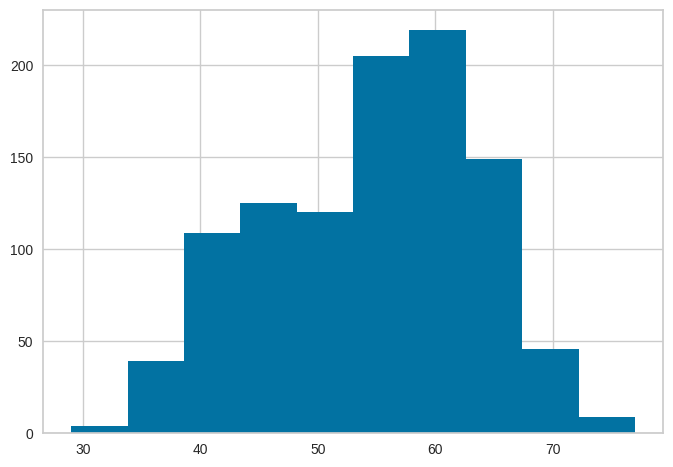

In [118]:
plt.hist(df['age']);

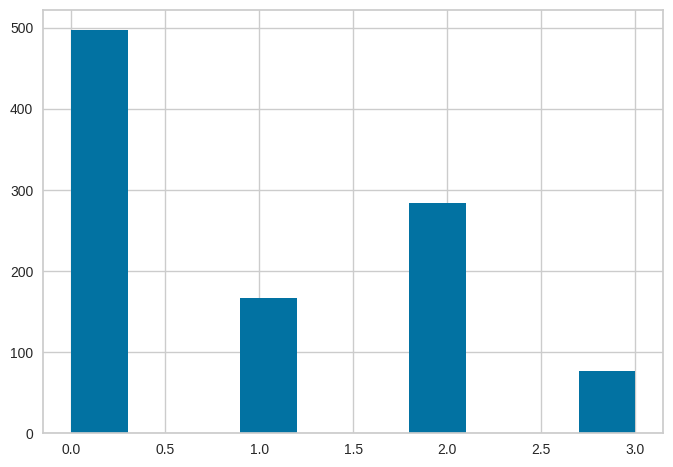

In [119]:
plt.hist(df['cp']);

consideração: a maior parte possui dor angina típica

In [159]:
# Removendo as colunas 'restecg' e 'slope' pois não apresentam muita importância
df = df.drop(['restecg', 'slope'], axis=1)

In [160]:
df.head()

,age,sex,cp,trestbps,chol,fbs,thalach,exang,oldpeak,ca,thal,target
0,52,1,0,125,212,0,168,0,1.0,2,3,0
1,53,1,0,140,203,1,155,1,3.1,0,3,0
2,70,1,0,145,174,0,125,1,2.6,0,3,0
3,61,1,0,148,203,0,161,0,0.0,1,3,0
4,62,0,0,138,294,1,106,0,1.9,3,2,0


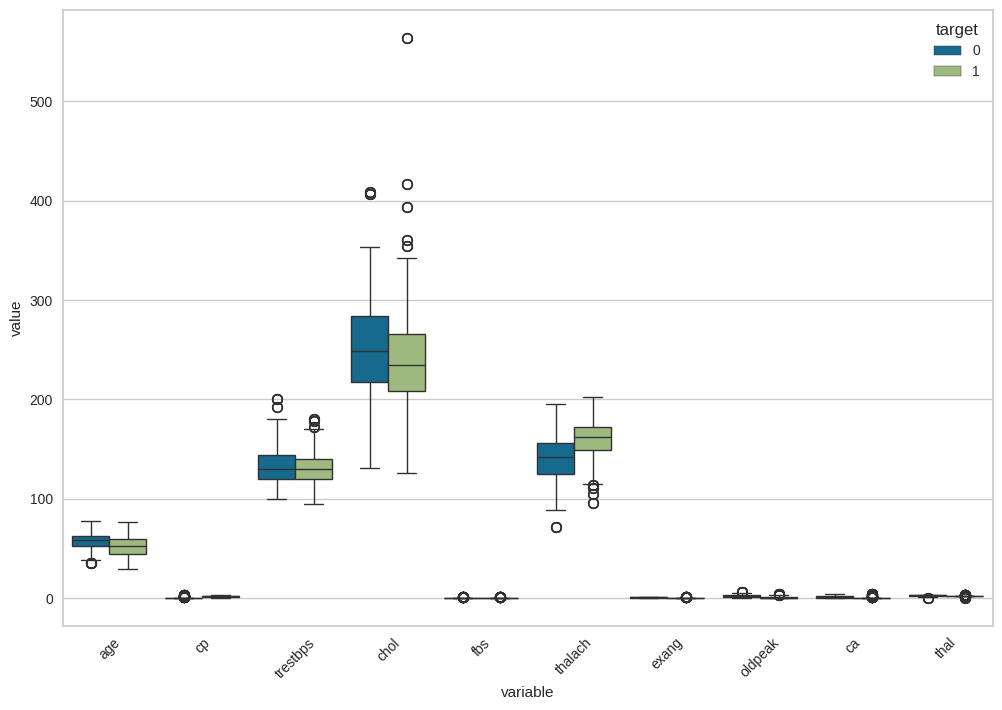

In [161]:
cols_numericas = ['age','cp','trestbps','chol','fbs','thalach','exang','oldpeak','ca','thal', 'target']
df_melted = pd.melt(df[cols_numericas], id_vars='target')
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='target', data=df_melted)
plt.xticks(rotation=45)
plt.show()

consideração: a coluna 'chol' apresenta outlier

## Tratamento de valores

In [162]:
# Calculo dos quartis
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)

# Calculo do IQR
IQR = Q3 - Q1

# Calculo do limite superior
upper_limit = Q3 + 1.5 * IQR
df.loc[df['chol'] > upper_limit, 'chol'] = upper_limit

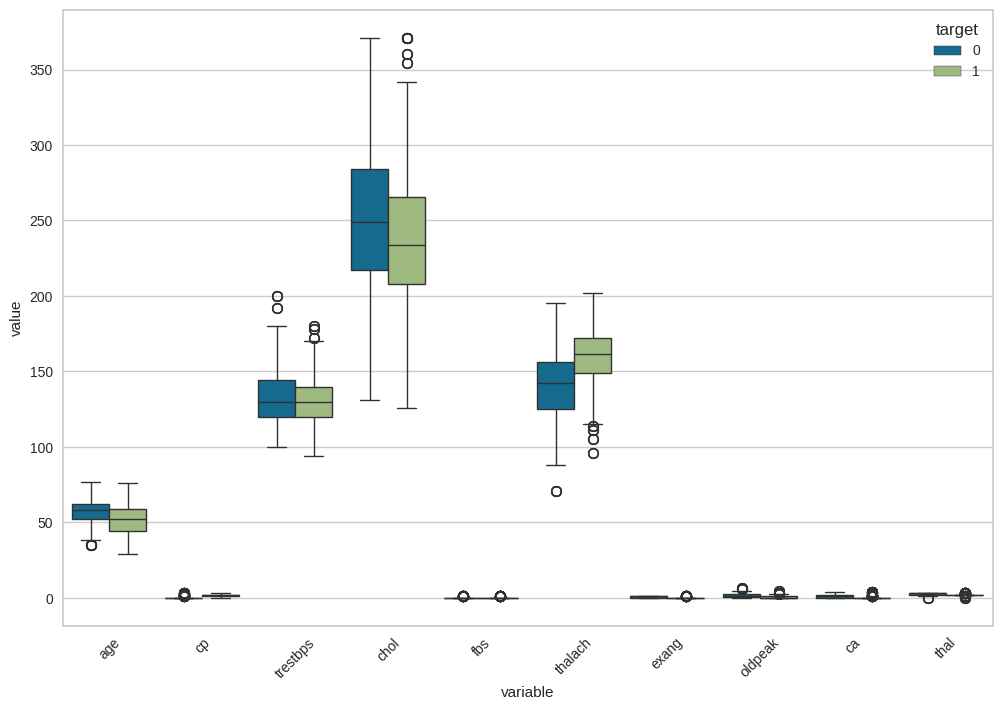

In [163]:
cols_numericas = ['age','cp','trestbps','chol','fbs','thalach','exang','oldpeak','ca','thal', 'target']
df_melted = pd.melt(df[cols_numericas], id_vars='target')
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', hue='target', data=df_melted)
plt.xticks(rotation=45)
plt.show()

In [164]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
thalach     0
exang       0
oldpeak     0
ca          0
thal        0
target      0
dtype: int64

## Divisão entre previsores e classe

In [138]:
type(df)

pandas.core.frame.DataFrame

In [165]:
X_heart = df.iloc[:, 0:10].values

In [166]:
X_heart

array([[52. ,  1. ,  0. , ...,  0. ,  1. ,  2. ],
       [53. ,  1. ,  0. , ...,  1. ,  3.1,  0. ],
       [70. ,  1. ,  0. , ...,  1. ,  2.6,  0. ],
       ...,
       [47. ,  1. ,  0. , ...,  1. ,  1. ,  1. ],
       [50. ,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [54. ,  1. ,  0. , ...,  0. ,  1.4,  1. ]])

In [167]:
y_heart = df.iloc[:, 11].values

In [168]:
y_heart

array([0, 0, 0, ..., 0, 1, 0])

In [185]:
type(X_heart)

numpy.ndarray

## Divisão treino e teste

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
X_heart_treinamento, X_heart_teste, y_heart_treinamento, y_heart_teste = train_test_split(X_heart, y_heart, test_size = 0.25, random_state = 0)

# Árvores de decisão

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
arvore_heart = DecisionTreeClassifier(criterion='entropy', random_state = 0)
arvore_heart.fit(X_heart_treinamento, y_heart_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [172]:
arvore_heart.feature_importances_

array([0.10829858, 0.06429257, 0.19735669, 0.13156129, 0.11761367,
       0.02280884, 0.07924185, 0.02943179, 0.10872838, 0.14066634])

In [173]:
arvore_heart.classes_

array([0, 1])

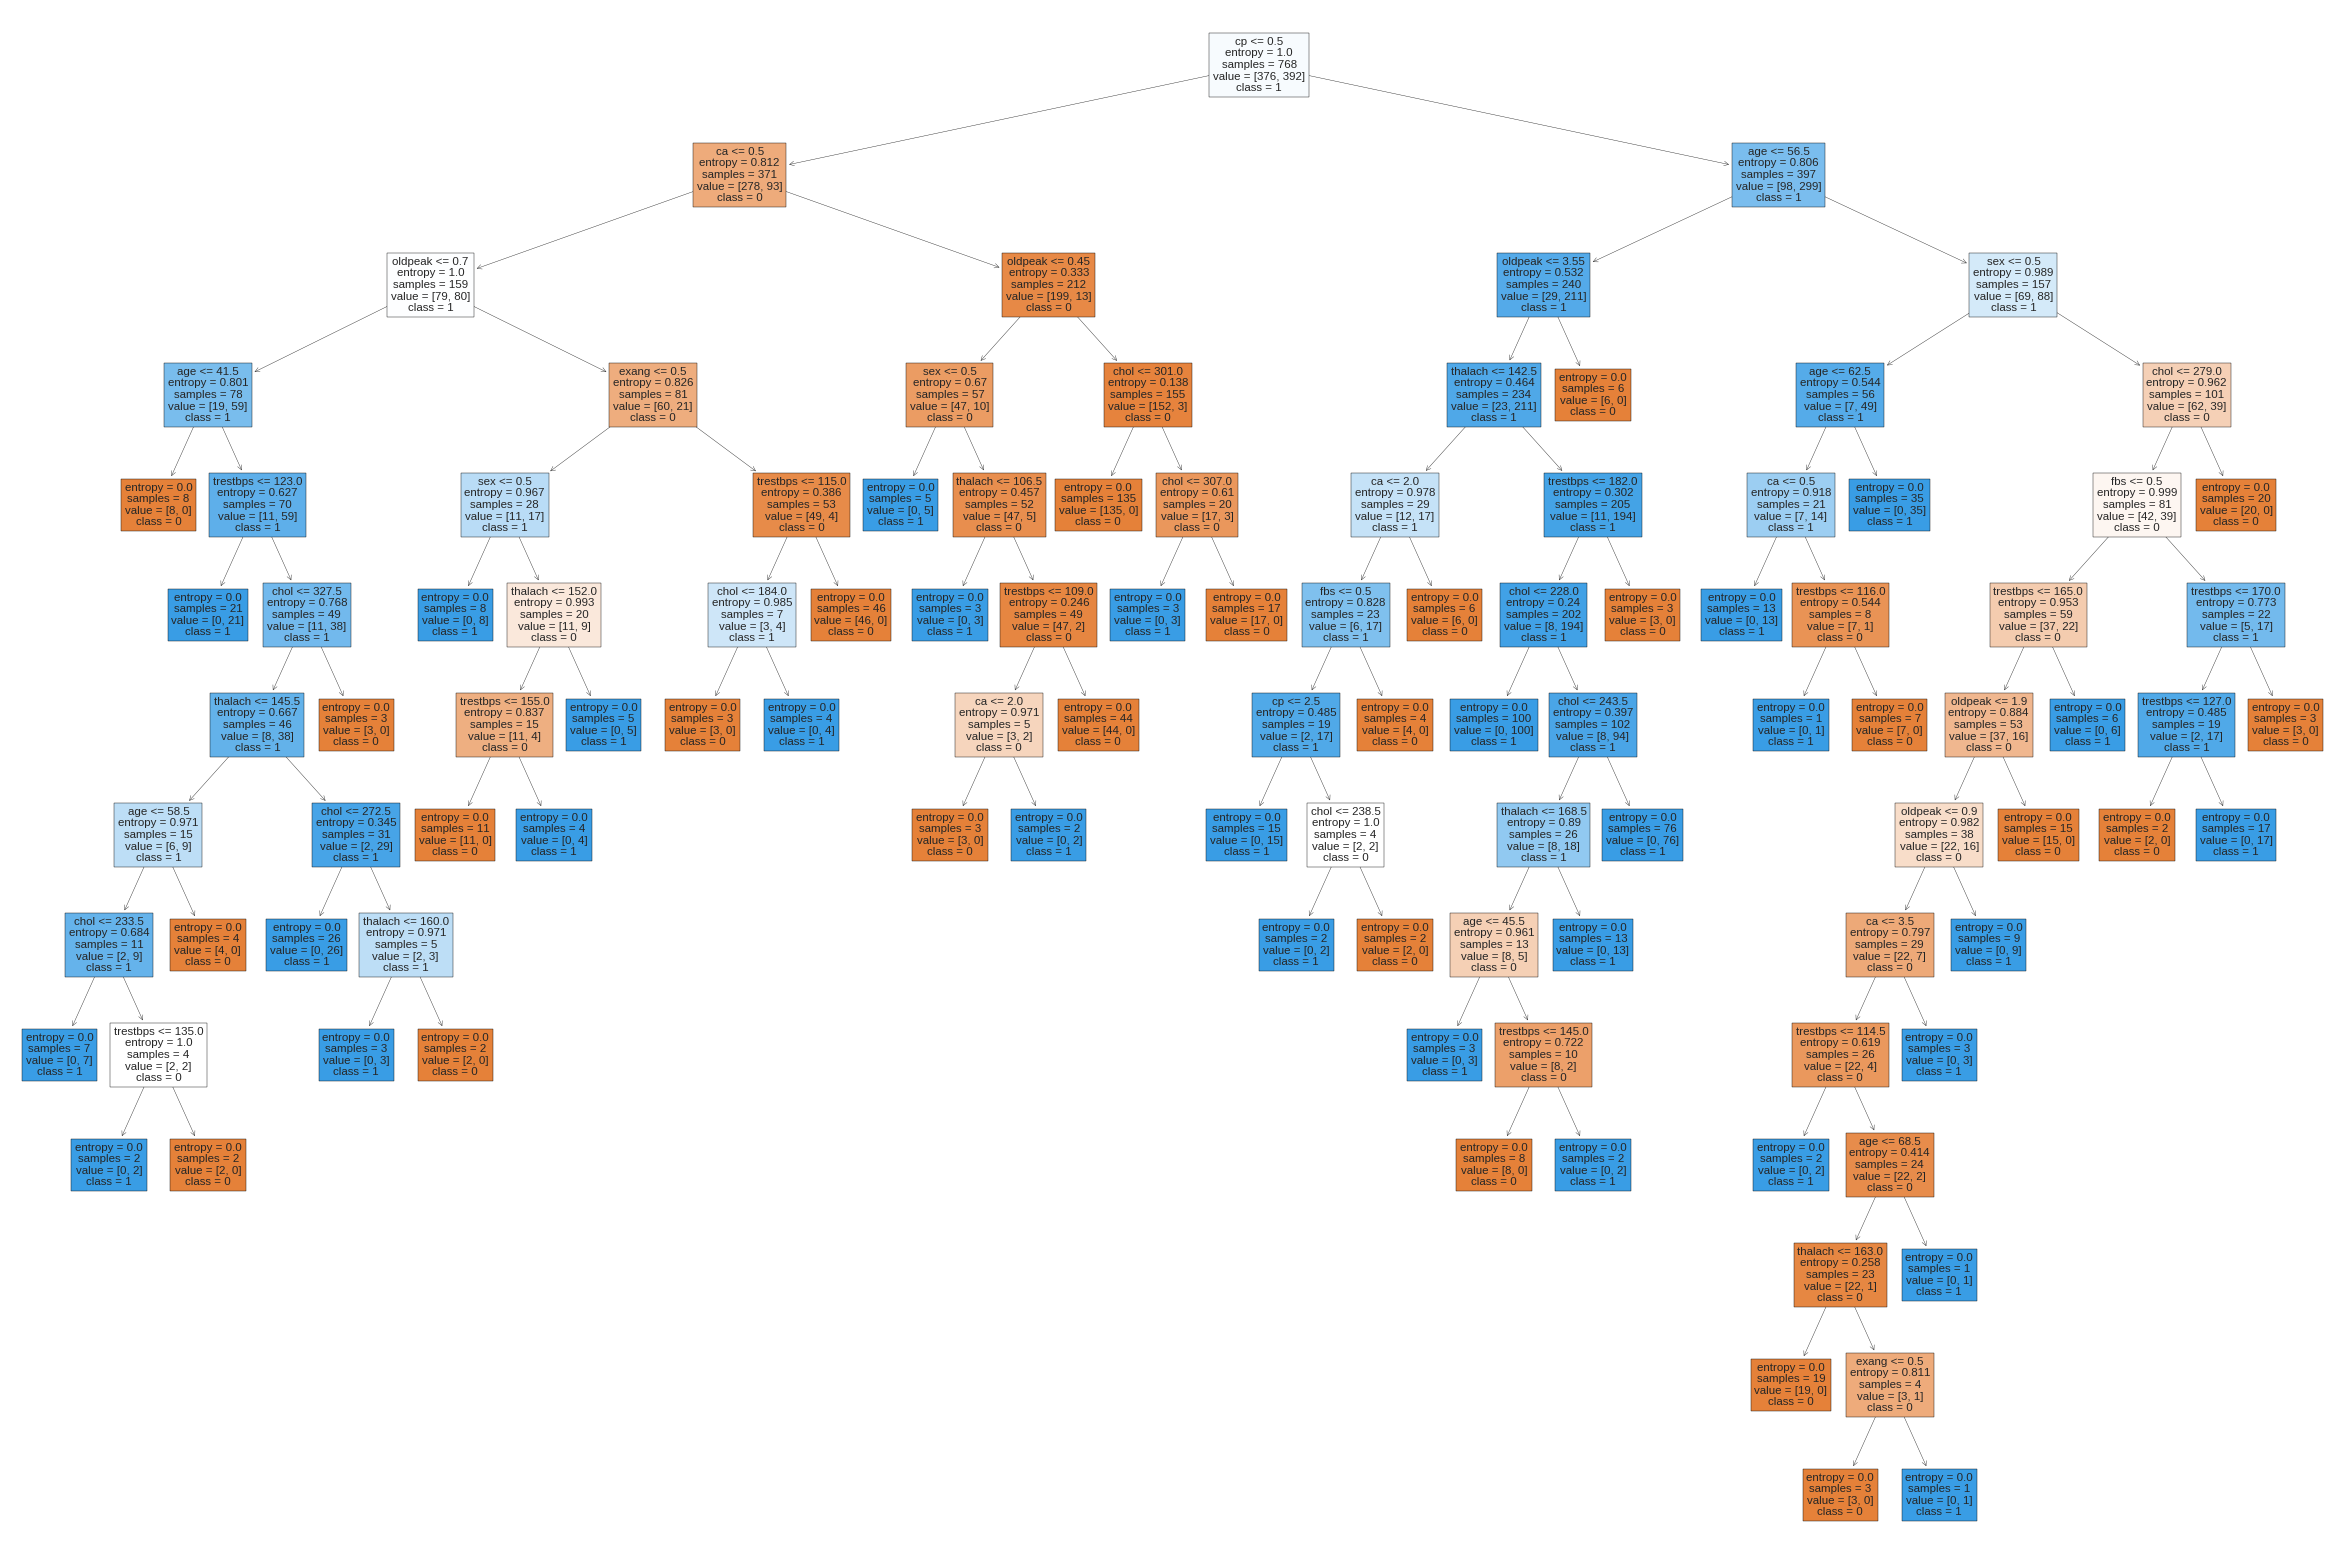

In [174]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'ca', 'thal']

# Conversao dos valores do array numpy para strings
class_names_str = [str(cls) for cls in arvore_heart.classes_]

figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(30, 20))
tree.plot_tree(arvore_heart, feature_names=previsores, class_names=class_names_str, filled=True)
plt.show()

- Testes

In [175]:
previsoes = arvore_heart.predict(X_heart_teste)
previsoes

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

- Simulação de previsão manual

In [187]:
dados_prev = np.array([[30, 2, 120, 200, 0, 1, 0, 0, 2, 2]])

previsoes = arvore_heart.predict(dados_prev)
previsoes

array([0])

- o paciente provavelmente não terá problemas

In [178]:
from sklearn.metrics import accuracy_score, classification_report

In [179]:
accuracy_score(y_heart_teste, previsoes)

1.0

1.0

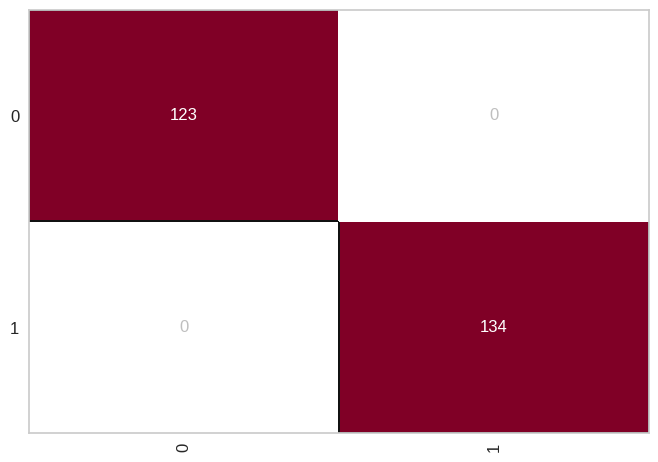

In [180]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_heart)
cm.fit(X_heart_treinamento, y_heart_treinamento)
cm.score(X_heart_teste, y_heart_teste)

In [181]:
print(classification_report(y_heart_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       134

    accuracy                           1.00       257
   macro avg       1.00      1.00      1.00       257
weighted avg       1.00      1.00      1.00       257

